In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
df_non_novel = pd.read_csv(input("Enter the Non Novel results csv file : "))
df_non_novel['label'] = 0

Enter the Non Novel results csv file : JCDL_Results/Dia_Non_Novel_Results.csv


In [4]:
df_novel = pd.read_csv(input("Enter the Novel results csv file : "))
df_novel['label'] = 1
#df_novel = df_novel[df_novel['paper_ID']<len(df_non_novel)]

Enter the Novel results csv file : JCDL_Results/Dia_Novel_Results.csv


Text(0, 0.5, 'Label')

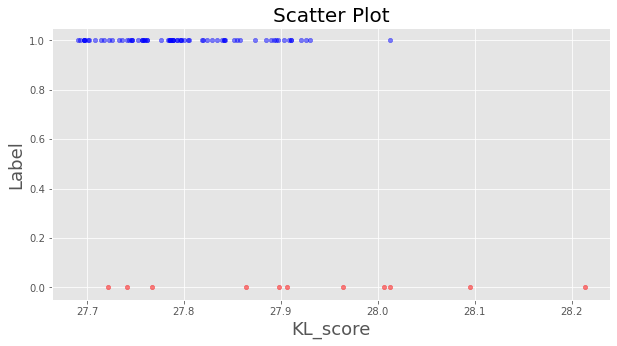

In [5]:
axl = df_novel.plot(kind='scatter', x='variance', y='label', color='blue', alpha=0.5, figsize=(10, 5))
df_non_novel.plot(kind='scatter', x='variance', y='label', color='red', alpha=0.5, figsize=(10, 5), ax = axl)
plt.title('Scatter Plot', size=20)
plt.xlabel('KL_score', size=18)
plt.ylabel('Label', size=18)

In [6]:
df = pd.concat([df_novel, df_non_novel]).reset_index(drop = True)

In [7]:
df.sort_values(by = ['KL_score'], inplace = True)
df.reset_index(drop = True, inplace = True)

In [8]:
threshold = df['KL_score'].median()

In [9]:
df

,paper_ID,KL_score,variance,label
0,40,-2.363991,27.824051,1
1,58,-2.135312,27.756550,1
2,2,-1.673032,27.797066,1
3,46,-1.648546,27.756279,1
4,14,-1.563860,27.841239,1
...,...,...,...,...
78,45,-0.807887,27.873195,1
79,2,-0.653278,28.006065,0
80,49,-0.396205,27.697268,1
81,61,0.000000,27.696595,1


In [10]:
threshold

-1.1445977005388799

In [11]:
df['predict'] = df['KL_score'] >= threshold
print(classification_report(df['label'], df['predict']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.74      0.43      0.54        72

    accuracy                           0.37        83
   macro avg       0.37      0.22      0.27        83
weighted avg       0.64      0.37      0.47        83

